In [76]:
import pandas as pd
import re 
import spacy 
import os 
import numpy as np

In [77]:
nlp = spacy.load("en_core_web_sm")

## Share paths

In [78]:
#df = pd.read_csv("../../../Glentel Inc/HR Analytics - Documents/Capstone Data/ubc_mds_team_share/06_clean_data/05182020_cleaned_english_resumes_V1.0.csv")

In [79]:
#df_train = pd.read_csv("../../../Glentel Inc/HR Analytics - Documents/Capstone Data/ubc_mds_team_share/02_eda_data/output/train_dataset.csv")

## Local Paths

In [80]:
df = pd.read_csv("../../data/input/feature_extraction/05182020_cleaned_english_resumes_V1.0.csv")

In [81]:
df.head(3)

,Unnamed: 0,employee_name,employee_code,store,raw_resume,resume_text,resume_bline,language,file_type,clean_text
0,0,"Abbasi, Samiee Z",N42,WW 374,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"Samiee Zahid Abbasi 61 Muscat Crescent Ajax, ON L1Z 0B8 Phone: 647-285-3809 E-mail: sabbasii@ic...","['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',...",English,docx,Zahid Muscat Crescent look build great work fastpaced environment skill Abilities read write spe...
1,1,"Abdi, Melika",N3O,TB 146,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkills\n\nExperien...,"Skills Experience MELIKA ABDI Carmelo Avenue Coquitlam, BC V3B7M9 Ph: 6047049487 melikaabdi94@g...","['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',...",English,pdf,Skills Experience Carmelo Avenue Ph ability work pressure effective leadership managemet Teamwor...
2,2,"Abdulali, Kaizar",BDP,WW 252,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"KAIZAR ABDULALI kaizar83@gmail.com | 780 990-8304 May 15th, 2019 Thank you for your considerati...","['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',...",English,pdf,thank consideration role Project Manager Business Analyst year Wireless Electronics Retail sale ...


In [82]:
df_train = pd.read_csv("../../data/input/feature_extraction/0607_02_training_dataset.csv")

In [83]:
df_train.head(2)

,employee_code,rehired_,referral_flag,job_hopper,average_tenure_per_job,shortest_tenure,competitor_experience,Freedom_competitor_exp,Koodo_competitor_exp,Shaw_competitor_exp,...,telco_electro_jobs,telco_electro_recency,recency_type_telco_electro_exp,no_job_categorical,telco_electro_perc_group,read_score_categorical,flag_hd_bachelor_plus,flag_hd_highschool,business_flag,no_jobs
0,MZE,No,1.0,0.0,22.00,14.0,1,0,0,0,...,1,2,low,few,significant,low,0,1,0,2
1,MRU,No,0.0,0.0,12.33,3.0,1,0,0,0,...,1,1,high,multiple,significant,high,0,0,0,3


In [84]:
df_train_code = df_train[['employee_code', 'hp_class']]

In [85]:
df_resume = df[['employee_code', 'employee_name', 'clean_text', 'resume_text']]

In [86]:
df_resume_clean = df_train_code.merge(df_resume, on='employee_code')

In [87]:
df_resume_clean.head(2)

,employee_code,hp_class,employee_name,clean_text,resume_text
0,MZE,0.0,"Birla, Shelly",Avenue Tel reference available request objective obtain fulltime position enable utilize custome...,"SHELLY BIRLA 1293 Midland Avenue Toronto, ON M1K4H4 Tel: (647) 554 - 5181 shelly_birla@hotmail...."
1,MRU,0.0,"Williams, Dave",Resume obtain utilize opportunity grow benefit employer self Work Experience Assistant Store Man...,"Indeed Resume Dave Williams To obtain and utilize opportunities; while growing, benefiting the ..."


## "Team player" phrase  and "Team" word features

In [88]:
def team_player_phrase(txt):
    txt = str(txt).lower()
    if re.search("team player", txt):
        flag = 1
    else:
        flag = 0
    return flag

In [89]:
def team_word(txt):
    txt = str(txt).lower()
    if re.search("team", txt):
        flag = 1
    else:
        flag = 0
    return flag

In [90]:
df_resume_clean['team_player_phrase'] = df_resume_clean.resume_text.apply(lambda x: team_player_phrase(x))
df_resume_clean['team_word'] = df_resume_clean.resume_text.apply(lambda x: team_word(x))
df_resume_clean.head(2)

,employee_code,hp_class,employee_name,clean_text,resume_text,team_player_phrase,team_word
0,MZE,0.0,"Birla, Shelly",Avenue Tel reference available request objective obtain fulltime position enable utilize custome...,"SHELLY BIRLA 1293 Midland Avenue Toronto, ON M1K4H4 Tel: (647) 554 - 5181 shelly_birla@hotmail....",1,1
1,MRU,0.0,"Williams, Dave",Resume obtain utilize opportunity grow benefit employer self Work Experience Assistant Store Man...,"Indeed Resume Dave Williams To obtain and utilize opportunities; while growing, benefiting the ...",0,0


In [91]:
#df_resume_clean[df_resume_clean['team_player']==1]['resume_text'].sample(n=1).iloc[0]

## Keyword Statistics

In [92]:
df_resume_clean[df_resume_clean['team_player_phrase']==1].count()

employee_code         42
hp_class              42
employee_name         42
clean_text            42
resume_text           42
team_player_phrase    42
team_word             42
dtype: int64

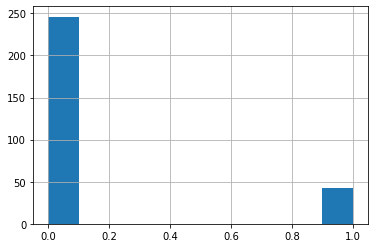

In [93]:
df_resume_clean.team_player_phrase.hist()

In [94]:
df_resume_clean[df_resume_clean['team_word']==1].count()

employee_code         221
hp_class              221
employee_name         221
clean_text            221
resume_text           221
team_player_phrase    221
team_word             221
dtype: int64

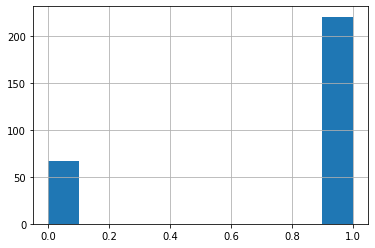

In [95]:
df_resume_clean.team_word.hist()

In [96]:
df_resume_clean.describe()

,hp_class,team_player_phrase,team_word
count,288.000000,288.000000,288.000000
mean,0.243056,0.145833,0.767361
std,0.429675,0.353553,0.423249
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000
75%,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000


# Generate Ouput

In [97]:
df_resume_clean = df_resume_clean.drop(['hp_class', 'employee_name', 'clean_text', 'resume_text'], axis=1)

In [98]:
df_resume_clean.to_csv('../../data/input/feature_extraction/auto_team_related_features.csv')

In [ ]:
#df_resume_clean.to_csv('../../../Glentel Inc/HR Analytics - Documents/Capstone Data/ubc_mds_team_share/06_clean_data/auto_education_concentration.csv')

# Generate Function

### Package installation missing:

In [ ]:
# docopt
#conda install -c anaconda docopt